https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887
https://blog.exploratory.io/is-prophet-better-than-arima-for-forecasting-time-series-fa9ae08a5851
https://towardsdatascience.com/time-series-forecasting-with-prophet-54f2ac5e722e
https://codeburst.io/introduction-to-time-series-forecasting-with-prophet-by-facebook-ae0a54d09e88
https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/
https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3

In [3]:
!pip install -U yfinance

  Created wheel for yfinance: filename=yfinance-0.1.52-py2.py3-none-any.whl size=21997 sha256=da1079b5e1fa2c7688c12925febdc7d2011d24f3c893e08fbeb4ea309f8d3b4f
  Stored in directory: /root/.cache/pip/wheels/1b/9d/ce/929e851fc7d649cd962c177220ad985675785aa97c54df5714
Successfully built yfinance


In [0]:
# imports datetime for picking beginning and end dates for the analysis
import datetime
# imports yahoo finance for getting historical stock prices
import yfinance as yf
# imports pandas for dataframe manipulation
import pandas as pd
# imports numpy
import numpy as np
# for data visualization
import matplotlib as mpl
# for changing the plot size in the Jupyter Notebook output
%matplotlib inline
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)
# for shorter lines with plotting
from matplotlib import pyplot as plt
# to hide warning messages
import warnings
warnings.filterwarnings('ignore')
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import coint

# sets the sample period as 5 years back from 09/12/2019
end = datetime.datetime(2019, 9, 12)
start = end - datetime.timedelta(days = 7*365)


# sets the sample period as 5 years back from 09/12/2019
end = datetime.datetime(2019, 9, 12)
start = end - datetime.timedelta(days = 7*365)

In [0]:
def tsplot(y, lags=None, figsize=(10, 8), style='seaborn-bright'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax, linewidth=1.5)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        
        plt.tight_layout()
    
    return

In [0]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True, test_type='adfuller'):
        
        if test_type=='adfuller':
            
            #Dickey-Fuller test:
            adfTest = adfuller(timeseries, autolag='AIC')

            self.pValue = adfTest[1]

            if (self.pValue<self.SignificanceLevel):
                self.isStationary = True
            else:
                self.isStationary = False

            if printResults:
                dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

                #Add Critical Values
                for key,value in adfTest[4].items():
                    dfResults['Critical Value (%s)'%key] = value

                print('####################################Augmented Dickey-Fuller Test Results:####################################')
                print(dfResults)
                print("Is the time series stationary? {0}".format(sTest.isStationary))
        if test_type =='adfuller':
            
            #Kwiatkowski-Phillips-Schmidt-Shin test for stationarity:
            kpssTest = kpss(timeseries)

            self.pValue = kpssTest[1]

            if (self.pValue<self.SignificanceLevel):
                self.isStationary = True
            else:
                self.isStationary = False

            if printResults:
                kpssResults = pd.Series(kpssTest[0:4], index=['KPSS Test Statistic','P-Value','# Lags Used','# Observations Used'])

                '''#Add Critical Values
                for key,value in kpssTest[4].items():
                    dfResults['Critical Value (%s)'%key] = value'''

                print('####################################KPSS Test Results:####################################')
                print(kpssResults)
                print("Is the time series stationary? {0}".format(sTest.isStationary))

In [0]:
# gets the closing price fo HDFC for the past 7 years
my_stock = yf.Ticker('HDFCBANK.NS')
my_stock = pd.DataFrame(my_stock.history(start = start, end = end)['Close'])

my_stock = my_stock.rename(str.lower, axis = 'columns')
my_stock['daily_ret']=my_stock.close.pct_change(1)
my_stock.drop('close', axis=1,inplace=True)
my_stock=my_stock.rename(columns={"daily_ret": "close"})
my_stock.dropna(inplace=True)

In [7]:
my_stock.head()

,close
Date,
2012-09-14,0.022646
2012-09-17,-0.007272
2012-09-18,-0.004688
2012-09-20,0.002392
2012-09-21,0.030068


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose 

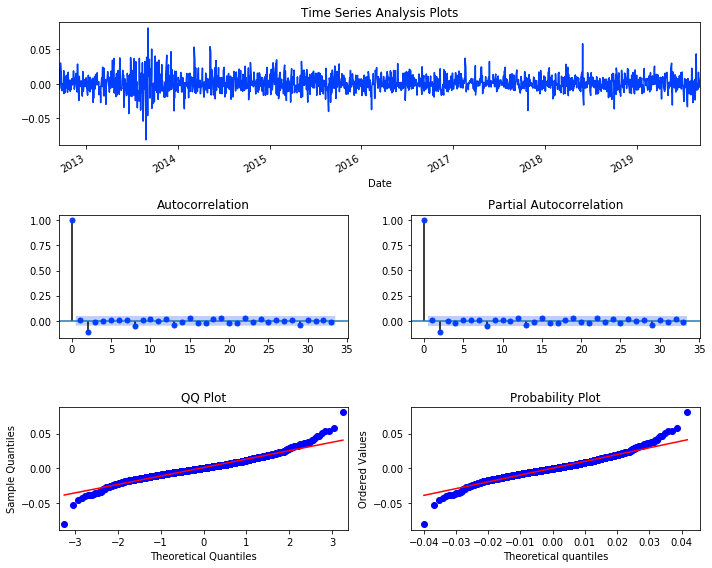

In [13]:
tsplot(my_stock.close)

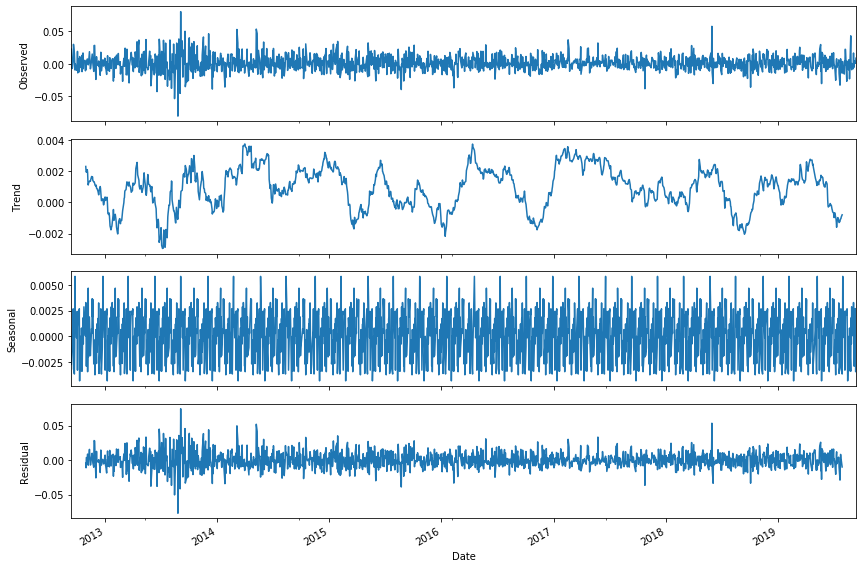

In [11]:
a = seasonal_decompose(my_stock["close"], model = "add", freq=58)
a.plot();